# Noise Injection and Classical Baseline Filters

In this notebook, we introduce realistic noise to the simulated detector signal and establish **classical signal processing baselines** for noise reduction.

Before applying machine learning methods, it is important to understand how well traditional filters perform. These classical approaches provide an interpretable and computationally inexpensive baseline against which ML-based methods can be evaluated.

We focus on:
- Adding Gaussian electronic noise
- Visualizing the effect of noise on the detector signal
- Applying a simple moving average filter as a baseline denoising method


In [1]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from src.signals import gaussian_pulse
from src.noise import add_gaussian_noise
from src.filters import moving_average


## Clean and Noisy Signals

We begin by generating a clean detector waveform and then adding Gaussian white noise to simulate electronic noise introduced during detector readout.


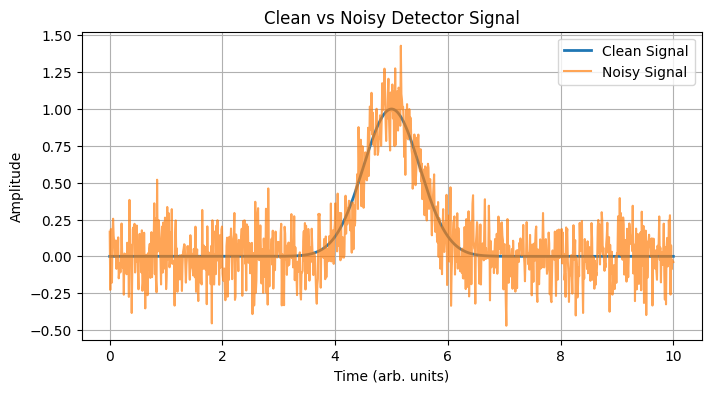

In [ ]:
# Time axis
t = np.linspace(0, 10, 1000)

# Generate clean signal
clean_signal = gaussian_pulse(t, amplitude=1, t0=5.0, sigma=0.5)

# Add Gaussian noise
noise_std = 0.15
noisy_signal = add_gaussian_noise(clean_signal, noise_std=noise_std)

# Plot for clean vs noisy signal
plt.figure(figsize=(8,4))
plt.plot(t, clean_signal, label='Clean Signal', linewidth=2)
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.7)
plt.xlabel('Time (arb. units)')
plt.ylabel('Amplitude')
plt.title('Clean vs Noisy Detector Signal')
plt.legend()
plt.grid(True)
plt.show()


## Moving Average Filter (Baseline)

As a simple classical baseline, we apply a **moving average filter**, which smooths the signal by averaging neighboring samples.

While this approach is easy to implement and interpret, it can distort sharp features in the signal. This tradeoff makes it a useful baseline for comparison.


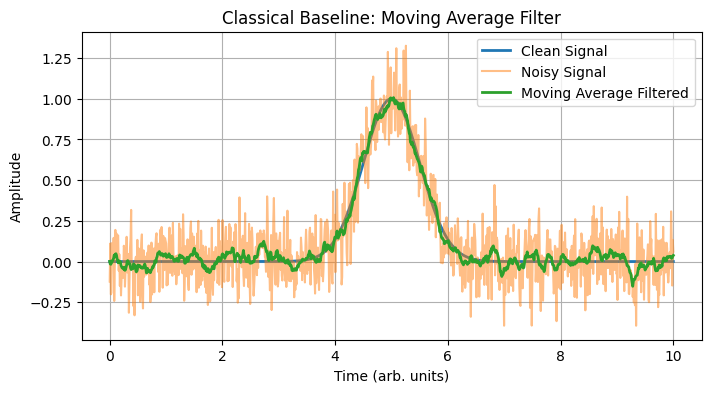

In [3]:
# Apply moving average filter
filtered_signal = moving_average(noisy_signal, window_size=15)

# Plot comparison
plt.figure(figsize=(8,4))
plt.plot(t, clean_signal, label='Clean Signal', linewidth=2)
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.5)
plt.plot(t, filtered_signal, label='Moving Average Filtered', linewidth=2)
plt.xlabel('Time (arb. units)')
plt.ylabel('Amplitude')
plt.title('Classical Baseline: Moving Average Filter')
plt.legend()
plt.grid(True)
plt.show()